In [1]:
import pandas as pd
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.metrics import confusion_matrix, roc_auc_score

In [2]:
df = pd.read_csv('Invistico_Airline.csv')

In [3]:
df.describe().round(3).T

,count,mean,std,min,25%,50%,75%,max
Age,129880.0,39.428,15.119,7.0,27.0,40.0,51.0,85.0
Flight Distance,129880.0,1981.409,1027.116,50.0,1359.0,1925.0,2544.0,6951.0
Seat comfort,129880.0,2.839,1.393,0.0,2.0,3.0,4.0,5.0
Departure/Arrival time convenient,129880.0,2.991,1.527,0.0,2.0,3.0,4.0,5.0
Food and drink,129880.0,2.852,1.444,0.0,2.0,3.0,4.0,5.0
Gate location,129880.0,2.990,1.306,0.0,2.0,3.0,4.0,5.0
Inflight wifi service,129880.0,3.249,1.319,0.0,2.0,3.0,4.0,5.0
Inflight entertainment,129880.0,3.383,1.346,0.0,2.0,4.0,4.0,5.0
Online support,129880.0,3.520,1.307,0.0,3.0,4.0,5.0,5.0
Ease of Online booking,129880.0,3.472,1.306,0.0,2.0,4.0,5.0,5.0


In [4]:
df.isnull().sum()

satisfaction                           0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Seat comfort                           0
Departure/Arrival time convenient      0
Food and drink                         0
Gate location                          0
Inflight wifi service                  0
Inflight entertainment                 0
Online support                         0
Ease of Online booking                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Cleanliness                            0
Online boarding                        0
Departure Delay in Minutes             0
Arrival Delay in Minutes             393
dtype: int64

In [5]:
df.describe()


,Age,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
count,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129487.000000
mean,39.427957,1981.409055,2.838597,2.990645,2.851994,2.990422,3.249130,3.383477,3.519703,3.472105,3.465075,3.485902,3.695673,3.340807,3.705759,3.352587,14.713713,15.091129
std,15.119360,1027.115606,1.392983,1.527224,1.443729,1.305970,1.318818,1.346059,1.306511,1.305560,1.270836,1.292226,1.156483,1.260582,1.151774,1.298715,38.071126,38.465650
min,7.000000,50.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,1359.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,3.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,40.000000,1925.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,4.000000,0.000000,0.000000
75%,51.000000,2544.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,5.000000,4.000000,5.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,85.000000,6951.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


array([[<AxesSubplot:title={'center':'Arrival Delay in Minutes'}>,
        <AxesSubplot:title={'center':'Departure Delay in Minutes'}>]],
      dtype=object)

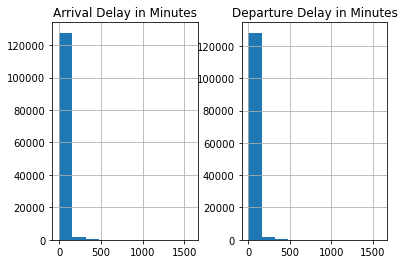

In [6]:
df[['Arrival Delay in Minutes','Departure Delay in Minutes']].hist()

array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Flight Distance'}>]], dtype=object)

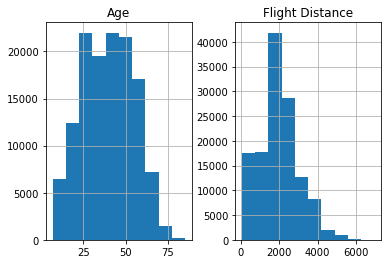

In [7]:
df[['Age','Flight Distance']].hist()

C:\Users\broth\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:345: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


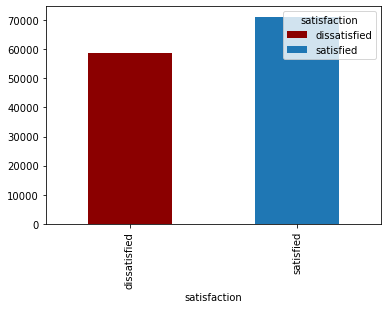

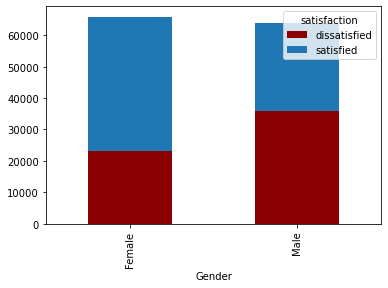

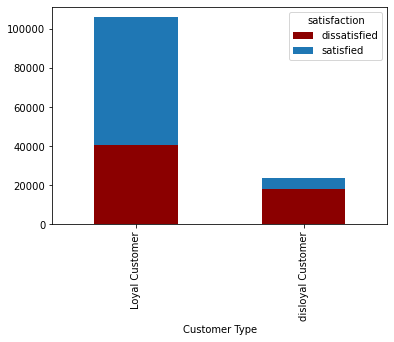

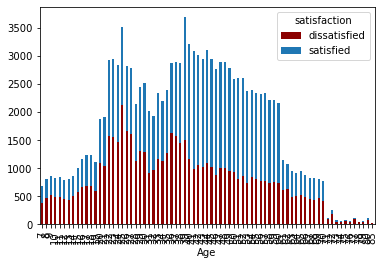

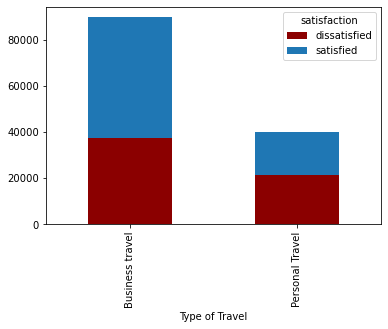

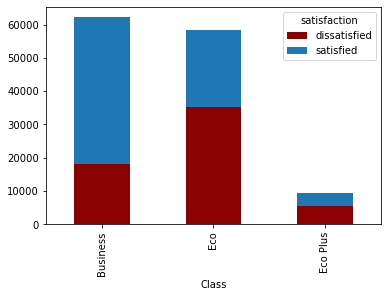

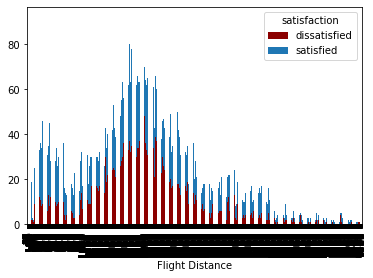

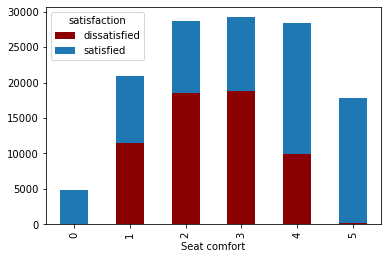

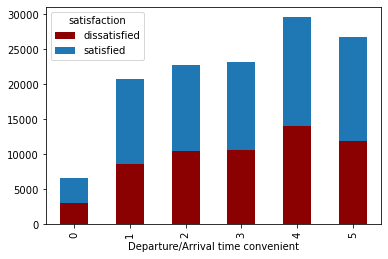

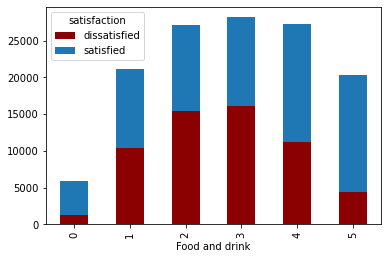

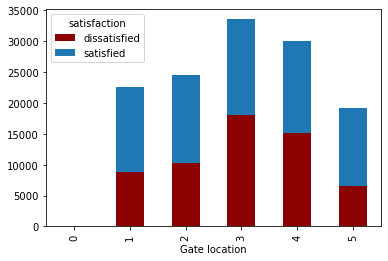

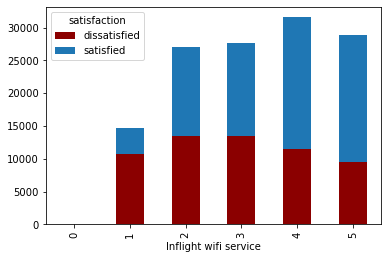

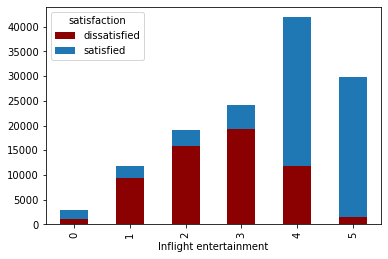

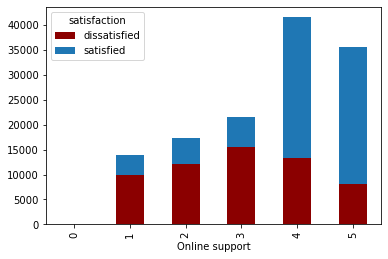

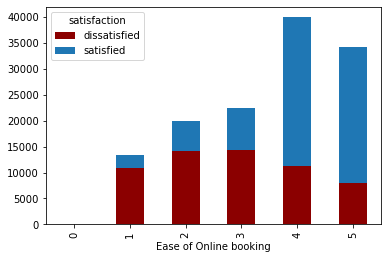

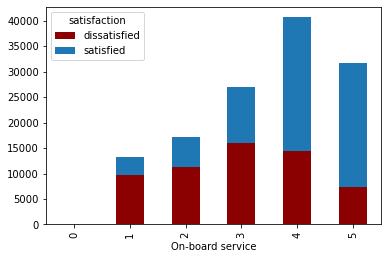

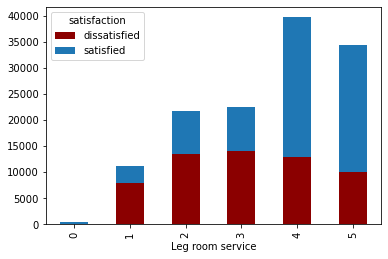

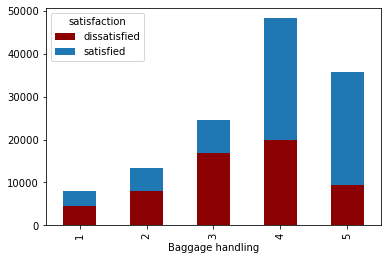

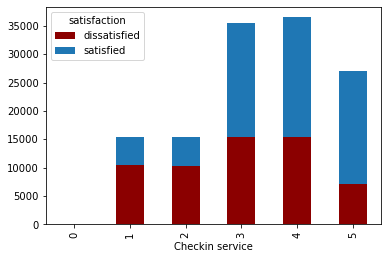

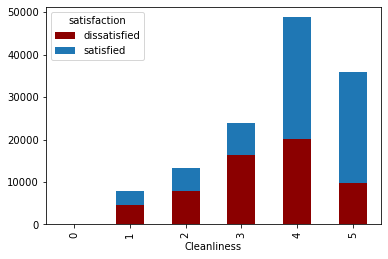

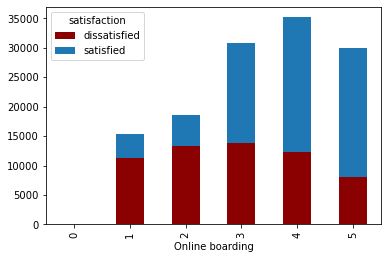

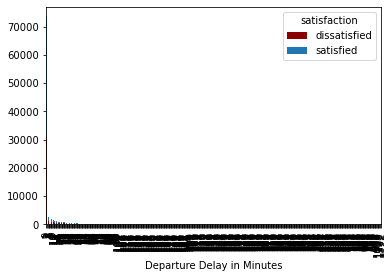

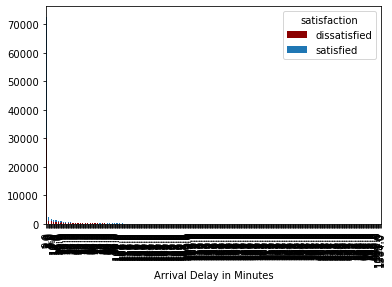

In [8]:
def plot_categories(column):
    df.groupby([column, 'satisfaction']).size().unstack().plot(kind='bar', stacked=True, color=['darkred', 'tab:blue'])

column_names = df.columns.values.tolist()

for name in column_names:
    plot_categories(name)

In [9]:
a = (df.to_numpy() == 0).mean()
print ("Sparsity: " + str(a.round(3)))

median_value = df['Arrival Delay in Minutes'].median()

df.isnull().sum()
df['Arrival Delay in Minutes'].fillna(value = median_value, inplace=True)

Sparsity: 0.056


In [10]:
def plot_categories(column):
    df.groupby([column, 'satisfaction']).size().unstack().plot(kind='bar', stacked=True, color=['darkred', 'tab:blue'])

In [11]:
categories = ['age','Port_modem', 'Phone', 'Multiple', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingMovies','StreamingTV']


In [12]:
df['satisfaction'] = df['satisfaction'].replace(to_replace=['satisfied', 'dissatisfied'], value=[1,0])
df['Class'] = df['Class'].replace(to_replace=['Eco', 'Eco Plus', 'Business'], value=[0,1,2])
df['Type of Travel'] = df['Type of Travel'].replace(to_replace=['Personal Travel', 'Business travel'], value=[1,0])
df['Customer Type'] = df['Customer Type'].replace(to_replace=['Loyal Customer', 'disloyal Customer'], value=[1,0])

pd.to_numeric(df['Class'])
pd.to_numeric(df['Type of Travel'])
pd.to_numeric(df['Customer Type'])

0         1
1         1
2         1
3         1
4         1
         ..
129875    0
129876    0
129877    0
129878    0
129879    0
Name: Customer Type, Length: 129880, dtype: int64

In [13]:
df['Intercept'] = 1
y = df['satisfaction']
X = df[['Customer Type', 'Class', 'Flight Distance', 'Seat comfort', 'Departure/Arrival time convenient', 'Food and drink', 'Gate location', 'Inflight wifi service', 'Inflight entertainment', 'Online support', 'Ease of Online booking', 'On-board service', 'Leg room service', 'Baggage handling', 'Checkin service', 'Cleanliness', 'Online boarding', 'Departure Delay in Minutes', 'Arrival Delay in Minutes', 'Intercept']]

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
logreg = LogisticRegression(max_iter=10000)
logreg.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

In [15]:
logit_model = sm.Logit(y_train,X_train)

result2 = logit_model.fit()
print(result2.summary2())
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Optimization terminated successfully.
         Current function value: 0.403374
         Iterations 7
                                  Results: Logit
Model:                    Logit                  Pseudo R-squared:       0.414     
Dependent Variable:       satisfaction           AIC:                    83864.4409
Date:                     2022-10-31 20:17       BIC:                    84055.4654
No. Observations:         103904                 Log-Likelihood:         -41912.   
Df Model:                 19                     LL-Null:                -71568.   
Df Residuals:             103884                 LLR p-value:            0.0000    
Converged:                1.0000                 Scale:                  1.0000    
No. Iterations:           7.0000                                                   
-----------------------------------------------------------------------------------
                                   Coef.  Std.Err.     z     P>|z|   [0.025  0.975]
---------

In [16]:
x = df[['Flight Distance','Arrival Delay in Minutes','Departure Delay in Minutes']]
vif_data = pd.DataFrame()
vif_data["feature"] = x.columns

vif_data["VIF"] = [variance_inflation_factor(x.values, i)
                  for i in range(len(x.columns))]

print(vif_data)

                      feature        VIF
0             Flight Distance   1.161604
1    Arrival Delay in Minutes  14.481207
2  Departure Delay in Minutes  14.451281


In [20]:
X = df[['Customer Type', 'Class', 'Flight Distance', 'Seat comfort', 'Departure/Arrival time convenient', 'Food and drink', 'Gate location', 'Inflight wifi service', 'Inflight entertainment', 'Online support', 'Ease of Online booking', 'On-board service', 'Leg room service', 'Baggage handling', 'Cleanliness', 'Checkin service', 'Online boarding', 'Arrival Delay in Minutes', 'Intercept']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
logreg.fit(X_train, y_train)
logit_model = sm.Logit(y_train,X_train)

result2 = logit_model.fit()
print(result2.summary2())
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Optimization terminated successfully.
         Current function value: 0.403392
         Iterations 7
                                  Results: Logit
Model:                    Logit                  Pseudo R-squared:       0.414     
Dependent Variable:       satisfaction           AIC:                    83866.0864
Date:                     2022-10-31 20:29       BIC:                    84047.5596
No. Observations:         103904                 Log-Likelihood:         -41914.   
Df Model:                 18                     LL-Null:                -71568.   
Df Residuals:             103885                 LLR p-value:            0.0000    
Converged:                1.0000                 Scale:                  1.0000    
No. Iterations:           7.0000                                                   
-----------------------------------------------------------------------------------
                                   Coef.  Std.Err.     z     P>|z|   [0.025  0.975]
---------

In [18]:
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[ 9345  2341]
 [ 2224 12066]]
